In [1]:
import pandas

from bessie.backtests import BacktestInputData, run_backtest, BatterySpec
from bessie.core import Region
from bessie.strategies import (
    ForecastBaseline,
    QuantilePicker,
    ClarabelOptimised,
)
from bessie import analysis


start = pandas.Timestamp("2022-01-01 00:00:00")
end = pandas.Timestamp("2022-02-01 00:00:00")

battery = BatterySpec(
    e_max=50,
    p_max=50,
    deg=0.00001,
    eta_chg=0.9,
    eta_dchg=0.95,
)
data = BacktestInputData.from_aemo_forecasts(
    start=start,
    end=end,
    region=Region.NSW,
)
strategies = {
    "Forecast": ForecastBaseline(50, 75),
    "Quantile": QuantilePicker(0.1, 0.9),
    "Clarabel": ClarabelOptimised(gamma=20, horizon=12 * 3),
}

2026-02-19 14:44:35,984 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_predispatch/_get_predispatch_price_single/year=2022month=1.netcdf
2026-02-19 14:44:36,117 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_predispatch/_get_predispatch_price_single/year=2022month=2.netcdf
2026-02-19 14:44:36,203 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_p5min/_get_p5min_price_single/year=2022month=1.netcdf
2026-02-19 14:44:36,211 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_p5min/_get_p5min_price_single/year=2022month=2.netcdf
2026-02-19 14:44:36,227 - INFO - root - nemosis query start: 2022/01/01 00:00:00
2026-02-19 14:44:36,227 - INFO - root - nemosis query end: 2022/02/01 00:00:00
2026-02-19 14:44:36,228 - INFO - nemosis.data_fetch_methods - Compiling data for table DISPATCHPRICE
2026-02-19 14:44:36,524 - INFO - nemosis.data_fetch_methods - Returning DISPATCHPRICE.


In [2]:
results = {
    name: run_backtest(data, battery, strat)
    for name, strat in strategies.items()
}

2026-02-19 14:44:36,636 - INFO - root - Running BESS backtest (njit) for strategy ForecastBaseline
2026-02-19 14:44:37,161 - INFO - root - Running BESS backtest (njit) for strategy QuantilePicker
2026-02-19 14:44:37,902 - INFO - root - Running BESS backtest for strategy ClarabelOptimised
2026-02-19 14:44:38,751 - WARNING - root - Strategy ClarabelOptimised produced action -1.0000000000099534 at index 507, which is outside the expected range [-1.0, 1.0]. Clipping to range.
2026-02-19 14:44:38,754 - WARNING - root - Strategy ClarabelOptimised produced action -1.0000000000076554 at index 508, which is outside the expected range [-1.0, 1.0]. Clipping to range.
2026-02-19 14:44:39,477 - WARNING - root - Strategy ClarabelOptimised produced action 1.0000000000074842 at index 863, which is outside the expected range [-1.0, 1.0]. Clipping to range.
2026-02-19 14:44:41,387 - WARNING - root - Strategy ClarabelOptimised produced action -1.000000000000166 at index 1945, which is outside the expecte

In [3]:
analysis.backtest_scorecard(data, battery, results)

Region:            NSW1
Energy capacity:   50 MWh
Power rating:      50 MW
Duration:          1.0 H
Degredation rate:  0.001000%
η (charge):        90.0%
η (discharge):     95.0%
N. Days:           31


Forecast Quantile Clarabel
Revenue     Total                   $6,022  $31,219  $58,434
            Per day                   $194   $1,007   $1,885
Activity    Charging intervals          48      231      330
            Charging %                0.5%     2.6%     3.7%
            Idle intervals           8,840    8,044    8,039
            Idle %                   99.0%    90.1%    90.0%
            Discharging intervals       40      653      559
            Discharging %             0.4%     7.3%     6.3%
Degradation Total actions               88      884      889
            Actions per day            2.8     28.5     28.7
            Final capacity (MWh)     49.96    49.56    49.56
            Capacity remaining %    99.91%   99.12%   99.11%

2026-02-19 14:44:54,556 - INFO - choreographer.browsers.chromium - Chromium init'ed with kwargs {}
2026-02-19 14:44:54,557 - INFO - choreographer.browsers.chromium - Found chromium path: /app/.venv/lib/python3.12/site-packages/choreographer/cli/browser_exe/chrome-linux64/chrome
2026-02-19 14:44:54,558 - INFO - choreographer.utils._tmpfile - Temp directory created: /tmp/tmpgjn86rin.
2026-02-19 14:44:54,559 - INFO - choreographer.browser_async - Opening browser.
2026-02-19 14:44:54,560 - INFO - choreographer.utils._tmpfile - Temp directory created: /tmp/tmp47yewoal.
2026-02-19 14:44:54,581 - INFO - choreographer.browsers.chromium - Temporary directory at: /tmp/tmp47yewoal
2026-02-19 14:44:54,860 - INFO - kaleido.kaleido - Conforming 1 to file:///tmp/tmpgjn86rin/index.html
2026-02-19 14:44:54,860 - INFO - kaleido.kaleido - Waiting on all navigates
2026-02-19 14:44:56,194 - INFO - kaleido.kaleido - All navigates done, putting them all in queue.
2026-02-19 14:44:56,197 - INFO - kaleido.kale

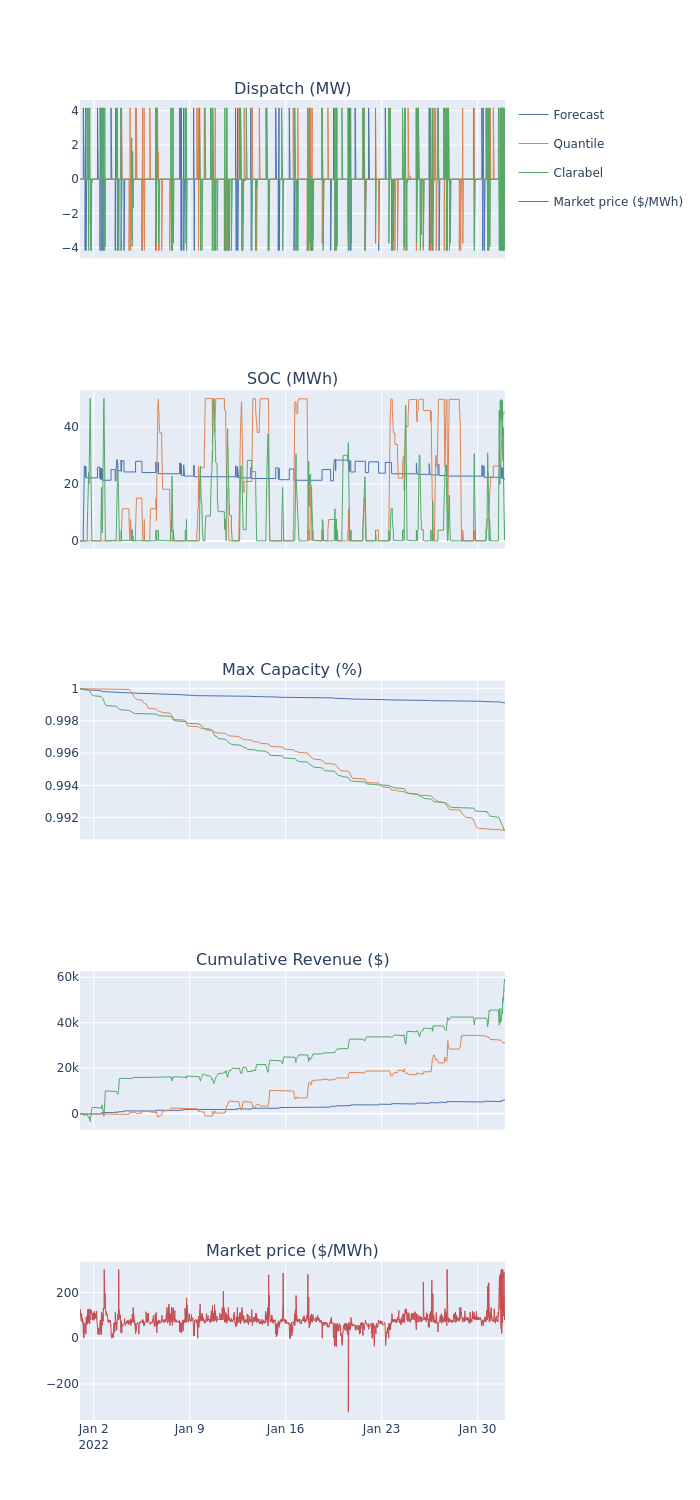

In [4]:
analysis.backtest_comparison(data, battery, results, resampler=False).show(
    "png"
)